In [15]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,precision_score,recall_score
import matplotlib.pyplot as plt
from sklearn import svm

In [16]:
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
           'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people',
           'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
           'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
           'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data',
           'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
           'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table',
           'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',
           'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
df = pd.read_csv('spambase.data', names=columns+['is_spam'], index_col=False)

In [17]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


#### Cleaning data and dropping unrequired columns

In [18]:
df=df.drop(columns=['capital_run_length_average','capital_run_length_longest','capital_run_length_total'])

#### Splitting into train and test sets

In [19]:
train,test=train_test_split(df,train_size=0.8,random_state=42)#,shuffle=True

In [20]:
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]

x_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]


In [21]:
x_train.shape

(3680, 54)

In [22]:
y_train.shape

(3680,)

In [23]:
x_test.shape

(921, 54)

In [24]:
y_test.shape

(921,)

In [25]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

## Radial Kernel
Taking parameters gamma=0.01 C=10 Accuracy=93.91%

#### Calculating training and test accuracy

In [27]:
model=svm.SVC(kernel='rbf',gamma=0.01,C=10)
#g=0.001 C=100 A=0.9349240780911063
#g=0.001 C=1000 A=0.9414316702819957

model.fit(x_train,y_train)
print('Training accuracy: {}'.format(model.score(x_train,y_train)))

predicted=model.predict(x_test)
print('Testing accuracy: ',accuracy_score(y_test,predicted))

Training accuracy: 0.9415760869565217
Testing accuracy:  0.9391965255157437


#### Evaluating Algorithm 

In [28]:
print(confusion_matrix(y_test,predicted))
print('Precision: ',precision_score(y_test,predicted))
print('Recall: ',recall_score(y_test,predicted))

[[513  18]
 [ 38 352]]
Precision:  0.9513513513513514
Recall:  0.9025641025641026


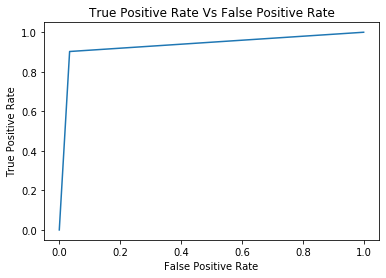

In [29]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted, pos_label=0)
# Print ROC curve
plt.plot(tpr,fpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("True Positive Rate Vs False Positive Rate")
plt.show()

gamma=0.001 C=10000 Accuracy=94.49%

#### Calculating training and test accuracy 

In [30]:
model=svm.SVC(kernel='rbf',gamma=0.001,C=10000)

model.fit(x_train,y_train)
print('Training accuracy: {}'.format(model.score(x_train,y_train)))

predicted=model.predict(x_test)
print('Testing accuracy: ',accuracy_score(y_test,predicted))

Training accuracy: 0.9559782608695652
Testing accuracy:  0.9424538545059717


#### Evaluating algorithm

In [31]:
print(confusion_matrix(y_test,predicted))
print('Precision: ',precision_score(y_test,predicted))
print('Recall: ',recall_score(y_test,predicted))

[[513  18]
 [ 35 355]]
Precision:  0.9517426273458445
Recall:  0.9102564102564102


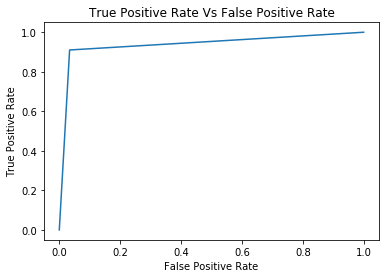

In [32]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted, pos_label=0)
# Print ROC curve
plt.plot(tpr,fpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("True Positive Rate Vs False Positive Rate")
plt.show()

## Linear Kernel
Taking parameters gamma=1 C=10 accuracy=91.74%

#### Calculating training and test accuracy

In [33]:
model=svm.SVC(C=10,gamma=1, kernel='linear')

model.fit(x_train,y_train)
print('Training accuracy: {}'.format(model.score(x_train,y_train)))

predicted=model.predict(x_test)
print('Testing accuracy: ',accuracy_score(y_test,predicted))

Training accuracy: 0.9263586956521739
Testing accuracy:  0.9174809989142236


#### Evaluating algorithm

In [34]:
print(confusion_matrix(y_test,predicted))
print('Precision: ',precision_score(y_test,predicted))
print('Recall: ',recall_score(y_test,predicted))

[[507  24]
 [ 52 338]]
Precision:  0.9337016574585635
Recall:  0.8666666666666667


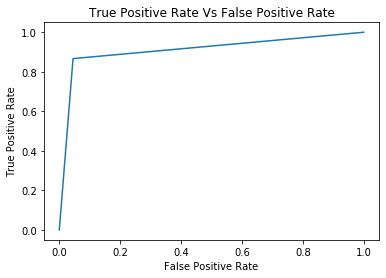

In [35]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted, pos_label=0)
# Print ROC curve
plt.plot(tpr,fpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("True Positive Rate Vs False Positive Rate")
plt.show()

### Using LinearSVC
Taking parameters C=1000 Accuracy= 91.53%

#### Calculating training and test accuracy

In [36]:
model=svm.LinearSVC(dual=False,C=1000)

model.fit(x_train,y_train)
print('Training accuracy: {}'.format(model.score(x_train,y_train)))

predicted=model.predict(x_test)
print('Testing accuracy: ',accuracy_score(y_test,predicted))

Training accuracy: 0.9241847826086956
Testing accuracy:  0.9153094462540716


#### Evaluating algorithm

In [37]:
print(confusion_matrix(y_test,predicted))
print('Precision: ',precision_score(y_test,predicted))
print('Recall: ',recall_score(y_test,predicted))

[[507  24]
 [ 54 336]]
Precision:  0.9333333333333333
Recall:  0.8615384615384616


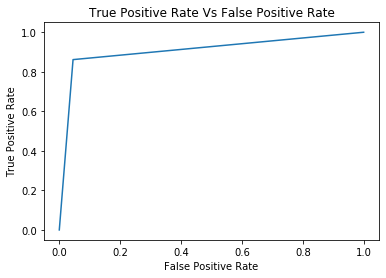

In [38]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted, pos_label=0)
# Print ROC curve
plt.plot(tpr,fpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("True Positive Rate Vs False Positive Rate")
plt.show()

## Quadratic Kernel

#### Claculating training and test accuracy

In [39]:
model=svm.SVC(C=100,kernel='poly',degree=4,gamma=0.1)
#gamma=0.1 C=1000 A=0.9154013015184381
#C=100,kernel='poly',degree=4,gamma=0.1 A=0.8915401301518439

model.fit(x_train,y_train)
print('Training accuracy: {}'.format(model.score(x_train,y_train)))

predicted=model.predict(x_test)
print('Testing accuracy: ',accuracy_score(y_test,predicted))

Training accuracy: 0.9684782608695652
Testing accuracy:  0.8968512486427795


#### Evaluating algorithm

In [40]:
print(confusion_matrix(y_test,predicted))
print('Precision: ',precision_score(y_test,predicted))
print('Recall: ',recall_score(y_test,predicted))

[[487  44]
 [ 51 339]]
Precision:  0.8851174934725848
Recall:  0.8692307692307693


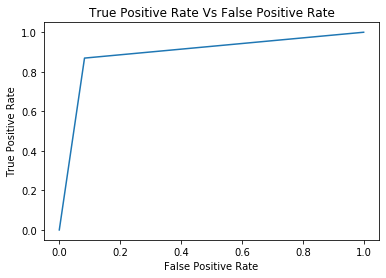

In [41]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted, pos_label=0)
# Print ROC curve
plt.plot(tpr,fpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("True Positive Rate Vs False Positive Rate")
plt.show()

## Finding best parameters
Used below algorithm to claculate the best parameters for linear,rbf and radial kernel.

In [42]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}

clf = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
clf.fit(x_train, y_train)
print("Best parameters set found on development set:")
print(clf.best_estimator_)

C:\Users\Avani Vaishnav\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.5min finished


Best parameters set found on development set:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [54]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}

clf = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
clf.fit(x_train, y_train)
print("Best parameters set found on development set:")
print(clf.best_estimator_)

C:\Users\Avani Vaishnav\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   23.3s finished


Best parameters set found on development set:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [14]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['poly']}

clf = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
clf.fit(x_train, y_train)
print("Best parameters set found on development set:")
print(clf.best_estimator_)

C:\Users\Avani Vaishnav\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, kernel=poly, total=  56.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   6.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 63.4min finished


Best parameters set found on development set:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
